In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)


In [2]:
credit_data=pd.read_csv("./01_dataset.csv")
credit_data.head(10)

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
0,1639,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,205.00","1,000,000.00","1,000,000.00","1,000,000.00",NaN,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,205.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00",NaN,"1,000,000.00",431.00,431.00,431.00,431.00,1.00,7.00,7.00,17.00,17.00,2.00,7.00,7.00,2.00,2.00,7.00,2.00,2.00,2.00,7.00,7.00,2.00,2.00,7.00,2.00,NaN,2.00,17.00,12.00,7.00,2.00,12.00,2.00,7.00,2.00,17.00,12.00,7.00,2.00,12.00

In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 124 entries, customer_id to OUTSTANDING_BAL_ALL_CURRENT
dtypes: float64(122), int64(2)
memory usage: 18.9 MB


In [4]:
credit_data.describe()

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
count,"20,000.00","20,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00"

In [5]:
credit_data.isnull().sum()

customer_id                          0
label                                0
SHORT_TERM_COUNT                  2000
MID_TERM_COUNT                    2000
LONG_TERM_COUNT                   2000
                                  ... 
ENQUIRIES_FROM_NON_BANK_6M_9M     2000
ENQUIRIES_FROM_NON_BANK_9M_12M    2000
ENQUIRIES_FROM_NON_BANK_6M_12M    2000
ENQUIRIES_FROM_NON_BANK_3M_12M    2000
OUTSTANDING_BAL_ALL_CURRENT       2000
Length: 124, dtype: int64

In [6]:
credit_data.drop(columns=["customer_id"],inplace=True)

In [7]:
credit_data.head(10)

,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
0,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,205.00","1,000,000.00","1,000,000.00","1,000,000.00",NaN,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,205.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00",NaN,"1,000,000.00",431.00,431.00,431.00,431.00,1.00,7.00,7.00,17.00,17.00,2.00,7.00,7.00,2.00,2.00,7.00,2.00,2.00,2.00,7.00,7.00,2.00,2.00,7.00,2.00,NaN,2.00,17.00,12.00,7.00,2.00,12.00,2.00,7.00,2.00,17.00,12.00,7.00,2.00,12.00,2.00,7.00,7.00,3

Tạo 1 heatmap xem xét độ tương quan giữa các cột

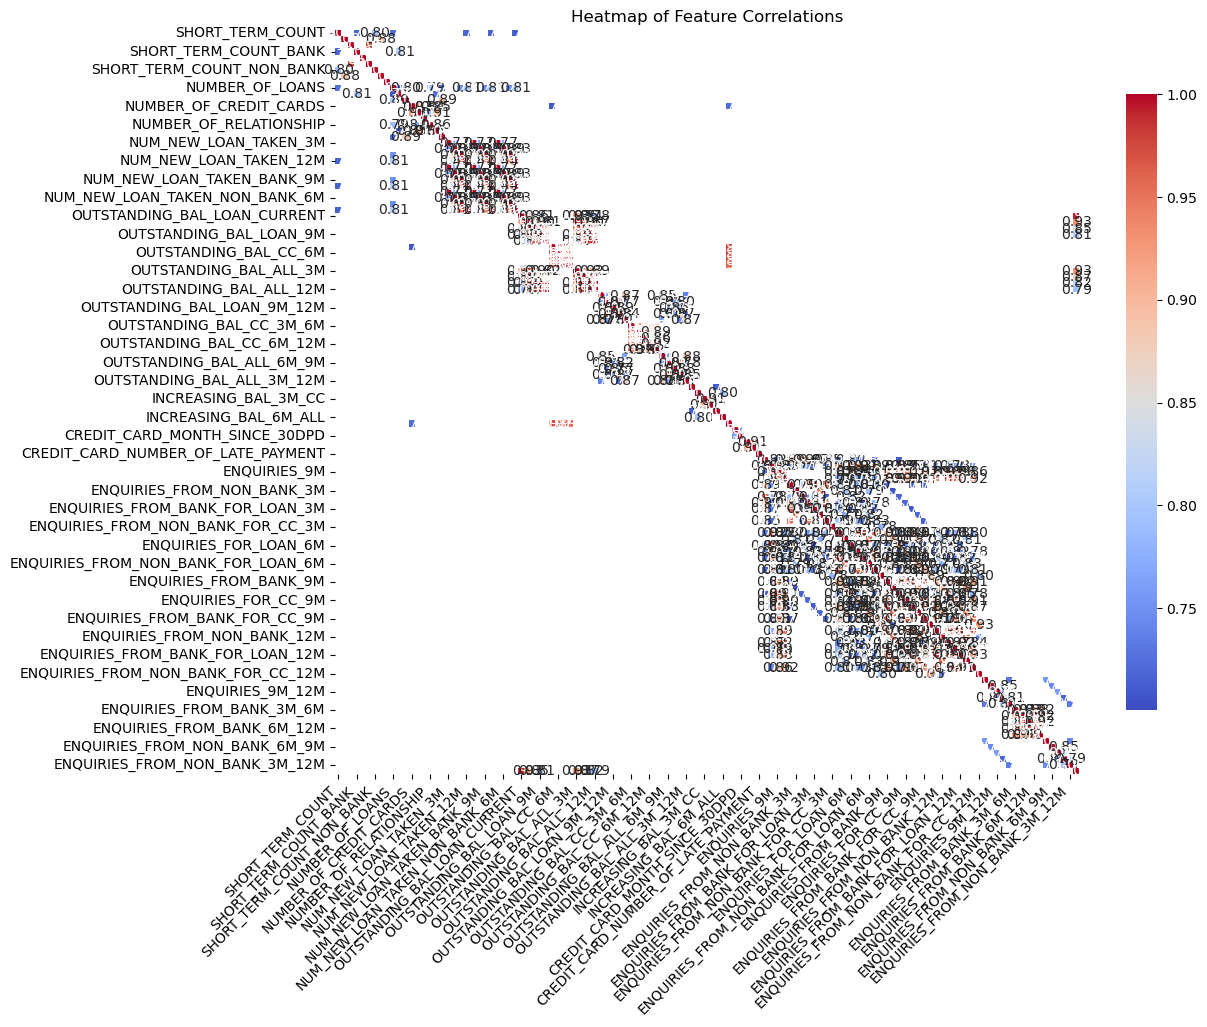

In [8]:
# Define the zoom function
def zoom(event):
    ax = plt.gca()
    scale_factor = 1.1  
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    if event.button == 'up':  # Zoom in
        ax.set_xlim([x * scale_factor for x in xlim])
        ax.set_ylim([y * scale_factor for y in ylim])
    elif event.button == 'down':  # Zoom out
        ax.set_xlim([x / scale_factor for x in xlim])
        ax.set_ylim([y / scale_factor for y in ylim])
    
    plt.draw()
correlation_matrix = credit_data.drop(columns=["label"]).corr()
threshold = 0.7
high_correlation = correlation_matrix[correlation_matrix.abs() > threshold]
plt.figure(figsize=(12, 10))
sns.heatmap(high_correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Feature Correlations')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0)
plt.gcf().canvas.mpl_connect('scroll_event', zoom)
plt.show()

In [9]:
# Get pairs of highly correlated columns
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))
# Create a DataFrame for sorting
pairs_df = pd.DataFrame(highly_correlated_pairs, columns=['Column1', 'Column2', 'Correlation'])
# Sort by absolute correlation value in descending order
pairs_df = pairs_df.reindex(pairs_df['Correlation'].abs().sort_values(ascending=False).index)
# Print the highly correlated pairs
i=0
for index, row in pairs_df.iterrows():
    print(f"{row['Column1']} and {row['Column2']} are highly correlated with a correlation coefficient of {row['Correlation']:.2f}")
    i+=1
print(i)

NUM_NEW_LOAN_TAKEN_NON_BANK_12M and NUM_NEW_LOAN_TAKEN_BANK_12M are highly correlated with a correlation coefficient of 1.00
NUM_NEW_LOAN_TAKEN_NON_BANK_9M and NUM_NEW_LOAN_TAKEN_9M are highly correlated with a correlation coefficient of 1.00
NUM_NEW_LOAN_TAKEN_BANK_3M and NUM_NEW_LOAN_TAKEN_3M are highly correlated with a correlation coefficient of 1.00
NUM_NEW_LOAN_TAKEN_BANK_9M and NUM_NEW_LOAN_TAKEN_9M are highly correlated with a correlation coefficient of 1.00
NUM_NEW_LOAN_TAKEN_BANK_12M and NUM_NEW_LOAN_TAKEN_12M are highly correlated with a correlation coefficient of 1.00
NUM_NEW_LOAN_TAKEN_NON_BANK_3M and NUM_NEW_LOAN_TAKEN_3M are highly correlated with a correlation coefficient of 1.00
NUM_NEW_LOAN_TAKEN_NON_BANK_3M and NUM_NEW_LOAN_TAKEN_BANK_3M are highly correlated with a correlation coefficient of 1.00
NUM_NEW_LOAN_TAKEN_NON_BANK_6M and NUM_NEW_LOAN_TAKEN_6M are highly correlated with a correlation coefficient of 1.00
NUM_NEW_LOAN_TAKEN_BANK_6M and NUM_NEW_LOAN_TAKEN_6M a

In [10]:
short_term = credit_data[['SHORT_TERM_COUNT','SHORT_TERM_COUNT_BANK','SHORT_TERM_COUNT_NON_BANK']]
short_term.head(10)

,SHORT_TERM_COUNT,SHORT_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK
0,1.00,1.00,1.00
1,10.00,7.00,4.00
2,7.00,7.00,1.00
3,7.00,NaN,7.00
4,NaN,1.00,1.00
5,NaN,NaN,1.00
6,4.00,1.00,4.00
7,19.00,NaN,13.00
8,4.00,1.00,4.00
9,7.00,4.00,4.00


In [11]:
short_term_corr = short_term.corr()

In [12]:
short_term_corr

,SHORT_TERM_COUNT,SHORT_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK
SHORT_TERM_COUNT,1.00,0.72,0.80
SHORT_TERM_COUNT_BANK,0.72,1.00,0.15
SHORT_TERM_COUNT_NON_BANK,0.80,0.15,1.00


In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(credit_data)
imputed_credit_data = imputer.transform(credit_data)
imputed_credit_data = pd.DataFrame(imputed_credit_data, columns=credit_data.columns)
imputed_credit_data.head(10)
credit_data = imputed_credit_data

In [14]:
remaining_columns = credit_data.drop(columns=["label"]).columns.tolist()
for c in remaining_columns:
    Q1 = credit_data[c].quantile(0.25)
    Q3 = credit_data[c].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (credit_data[c] >= lower_bound) & (credit_data[c] <= upper_bound)

# Lọc DataFrame để chỉ giữ lại các bản ghi không có ngoại lai
cleaned_credit_data = credit_data[mask]

In [15]:
X = credit_data.drop(columns = ["label"])
y=credit_data["label"]
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Khởi tạo các mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Extra Tree Classifier': ExtraTreesClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(algorithm='SAMME')
}
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy


In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Tạo neuron network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=50, 
                    validation_split=0.2, callbacks=[early_stopping])
# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7860 - loss: 0.5104 - val_accuracy: 0.8869 - val_loss: 0.3342
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8702 - loss: 0.3718 - val_accuracy: 0.8875 - val_loss: 0.3264
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8690 - loss: 0.3711 - val_accuracy: 0.8884 - val_loss: 0.3226
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8681 - loss: 0.3641 - val_accuracy: 0.8913 - val_loss: 0.3175
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8780 - loss: 0.3423 - val_accuracy: 0.8894 - val_loss: 0.3227
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8751 - loss: 0.3477 - val_accuracy: 0.8903 - val_loss: 0.3193
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8765 - loss: 0.3457 - val_accuracy: 0.8919 - val_loss: 0.3184
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8803 - loss: 0.3383 - val_accu

In [17]:
results["Neuron Network"] = test_accuracy
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df.sort_values(by='Accuracy', ascending=False))


                    Model  Accuracy
2           Random Forest      0.89
7     AdaBoost Classifier      0.89
6   Extra Tree Classifier      0.89
8          Neuron Network      0.89
3  Support Vector Machine      0.88
0     Logistic Regression      0.87
4     K-Nearest Neighbors      0.87
1           Decision Tree      0.81
5             Naive Bayes      0.57


In [18]:
results_df[results_df['Accuracy']==max(results_df['Accuracy'])]

,Model,Accuracy
2,Random Forest,0.89
